In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import multiplotlineX, overlaymultiplotX,overlaymultiplotXSave
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png, output_notebook
from HoughLine import show_poly_regression

from numpy import convolve

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
sourcedir = '/Users/aimachine/DivisionTests/RealRotatedResNet/MoveContinuos/'

In [3]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Saving Plot for : ResNetDots-TOverlapMovie1


Loading BokehJS ...

Coefficients (High -> Low) [ 2.64773484e-17 -2.66923347e-14  1.15620504e-11 -2.81397309e-09
  4.22729518e-07 -4.06088985e-05  2.50726119e-03 -9.78607192e-02
  2.31339758e+00 -3.01172467e+01  4.36058463e+02]


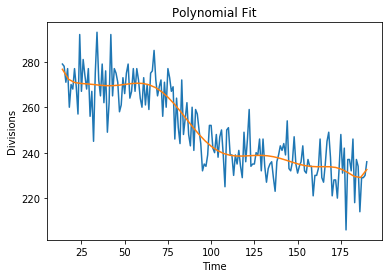

Loading BokehJS ...

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 177), ('y', 171)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Loading BokehJS ...

Coefficients (High -> Low) [ 1.26653789e-17 -1.26950909e-14  5.40137681e-12 -1.26700381e-09
  1.77844826e-07 -1.51209488e-05  7.44059147e-04 -1.80392720e-02
  6.33129141e-02  5.20607310e+00  2.04507059e+02]


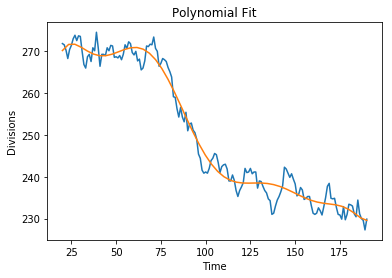

Loading BokehJS ...

Saving Plot for : ResNetDots-TOverlapTestMovie


Loading BokehJS ...

Coefficients (High -> Low) [ 1.19029692e-17 -1.15494384e-14  4.80567965e-12 -1.12123282e-09
  1.61221303e-07 -1.48263681e-05  8.79733221e-04 -3.33285820e-02
  7.77235873e-01 -1.00514042e+01  7.43219738e+01]


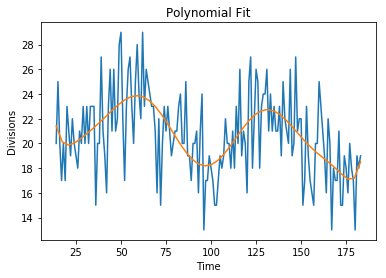

Loading BokehJS ...

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 170), ('y', 164)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Loading BokehJS ...

Coefficients (High -> Low) [ 9.52809211e-18 -9.47928833e-15  4.04522830e-12 -9.68144891e-10
  1.42815030e-07 -1.34748023e-05  8.20498590e-04 -3.19403341e-02
  7.68990567e-01 -1.03941948e+01  7.99237035e+01]


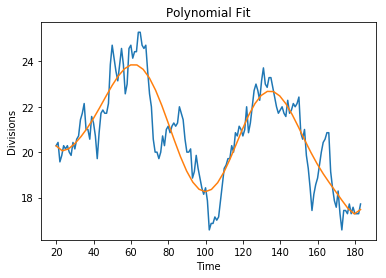

Loading BokehJS ...

In [6]:


Path = os.path.join(sourcedir, '*.txt')
X = sorted(glob.glob(Path))
Names = sorted(glob.glob(Path))
for file in Names:
 Time = []
 Xcord = []
 Ycord = []   
 base = os.path.split(file)[-1]

 Filename = os.path.splitext(base)
 print('Saving Plot for :', Filename[0])
 
 time, X, Y = np.loadtxt(file, delimiter = ',', skiprows = 1, unpack=True)
 
 Time.append(time)
 Xcord.append(X)
 Ycord.append(Y)
 maxtime = np.max(Time)
 mintime = np.min(Time)

 DivisionList = []
 for time in range(int(mintime), int(maxtime) + 1):
     
     timecounter = 0  
     for i in np.nditer(Time):
       
       if(time == i):
            timecounter = timecounter + 1
       
     Div = (time, timecounter)
        
     DivisionList.append(Div)
 X =[]
 Y = []
 Z = []   
 for i in range(10,len(DivisionList)-10):       
   #Bokeh plots
   
   X.append(DivisionList[i][0])
   Y.append(DivisionList[i][1])
   
   
 p = figure(title='Division Counter', x_axis_label='Time', y_axis_label='Division Number')
 p.line(X, Y, legend = "Divisions-Time", line_width = 2)
   
 output_notebook()
 show(p)
 export_png(p, filename=sourcedir + 'DivisionCounter' + Filename[0] + '.png')
 show_poly_regression(X,Y,10)
 
 Z = movingaverage(Y,7)
 q = figure(title='Division Counter', x_axis_label='Time', y_axis_label='Division Number')
 q.line(X, Z, legend = "Divisions-Time", line_width = 2)
   
 output_notebook()
 show(q)
 export_png(q, filename=sourcedir + 'MovAv-DivisionCounter' + Filename[0] + '.png')  
 show_poly_regression(X[len(X)-len(Z):],Z,10)    


